<a href="https://colab.research.google.com/github/Muhammad0Awais/sber_zvuk_hackathon/blob/main/CommonNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
HomeAddresses = "/content/drive/MyDrive/hackathon/photoContent/Адрес_дома"

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,923 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
# import the necessary packages
from PIL import Image
import pytesseract
import argparse
import cv2
import os

In [ ]:
imagePath = "/content/loll.png"
# load the example image and convert it to grayscale
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# check to see if we should apply thresholding to preprocess the
# image
if True:
	gray = cv2.threshold(gray, 0, 255,
		cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# make a check to see if median blurring should be done to remove
# noise
# elif args["preprocess"] == "blur":
# 	gray = cv2.medianBlur(gray, 3)
# write the grayscale image to disk as a temporary file so we can
# apply OCR to it
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)


True

In [ ]:
# Get bounding box estimates
print(pytesseract.image_to_boxes(Image.open(image_path_in_colab)))

~ 88 55 258 306 0



text BIG FAT

BoLpD HEADLINE



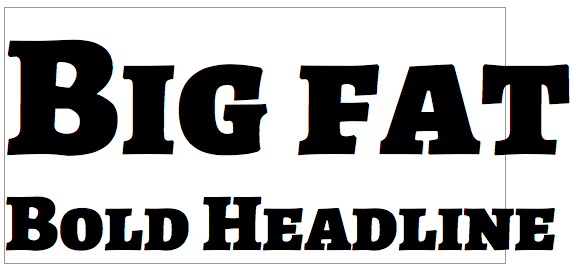

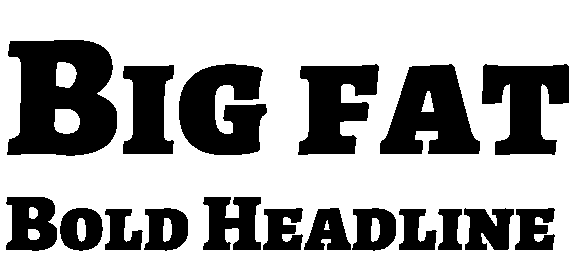

-1

In [ ]:
from google.colab.patches import cv2_imshow
# load the image as a PIL/Pillow image, apply OCR, and then delete
# the temporary file
text = pytesseract.image_to_string(Image.open(filename))
os.remove(filename)
print("text",text)
# show the output images
cv2_imshow(image)
cv2_imshow(gray)
cv2.waitKey(0)

In [ ]:
from collections import Counter
CityQuantities = [] 
list1 = ['x','y','z','x','x','x','y', 'z']
counts = Counter(list1)
for cnt in counts:
  CityQuantities.append((cnt, counts[cnt]))

print(CityQuantities)

[('x', 4), ('y', 2), ('z', 2)]


In [ ]:
import os
from collections import Counter
import numpy as np
import cv2
import json

def loadCity(path):
  cityImages = []
  # Getting the current work directory (cwd)
  thisdir = path

  # r=root, d=directories, f = files
  for r, d, f in os.walk(thisdir):
      for file in f:
          if file.endswith(".jpg"):
              cityImages.append(os.path.join(r, file))
  return cityImages

def loadData(path):
  allData = dict()
  subfolders = [ f.path for f in os.scandir(path) if f.is_dir() ]
  for folder in subfolders:
    allData[folder] = loadCity(folder)
  return allData

def processCity(cityName, labelsPath, weightsPath, configPath):
  companyLists = list()
  for image in cityName:
    companyLists.extend(getLabels(image, labelsPath, weightsPath, configPath))
  return companyLists

def makeSets(cityLists):
  CityQuantities = [] 
  counts = Counter(cityLists)
  for cnt in counts:
    CityQuantities.append((cnt, counts[cnt]))
  return CityQuantities

def getLabels(filename, labelsPath, weightsPath, configPath):
    # companies = ["tattelecom","beeline","dom_ru","interdol","kgs","mts","rostelecom","tatais","address"]
    # from random import randrange
    # return [companies[randrange(3)], companies[randrange(3)], companies[randrange(3)]]
    print(filename)
    LABELS = open(labelsPath).read().strip().split("\n")

    # np.random.seed(42)
    np.random.seed(100)

    net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)
    ln = net.getLayerNames()
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    (W, H) = (None, None)

    # read the next frame from the file
    frame = cv2.imread(filename)
    if frame is not None:
        frame = cv2.resize(frame,(416,416))
        ff = frame
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame = np.dstack([frame, frame, frame])

        # if the frame dimensions are empty, grab them
        if W is None or H is None:
            (H, W) = frame.shape[:2]

        blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (416, 416),
                                     swapRB=True, crop=False)
        net.setInput(blob)
        layerOutputs = net.forward(ln)
        confidences = []
        predictedClasses = []

        # loop over each of the layer outputs
        for output in layerOutputs:
            # loop over each of the detections
            for detection in output:
                scores = detection[5:]
                classID = np.argmax(scores)
                confidence = scores[classID]
                if confidence > 0.5:
                    confidences.append(float(confidence))
                    predictedClasses.append(LABELS[classID])
        return predictedClasses

def processData(citiesLabels, labelsPath, weightsPath, configPath):
  cities = dict()

  for city in citiesLabels:
    citylist = processCity(citiesLabels[city], labelsPath, weightsPath, configPath)
    if len(makeSets(citylist))>0:
      citylabel = city.split("/")[-1]
      cities[citylabel]= makeSets(citylist)
  return cities

def saveDictionary(cities):
  with open('data.json', 'w') as fp:
      json.dump(cities, fp)

def main():
    labelsPath = "/content/drive/MyDrive/hackathon/photoContent/summary/classes.txt"
    weightsPath = "/content/drive/MyDrive/hackathon/photoContent/summary/yolov3_training_last.weights"
    configPath = "/content/drive/MyDrive/hackathon/photoContent/summary/yolov3_testing.cfg"
    path = "/content/drive/MyDrive/hackathon/photoContent/summary/newData"
    data = loadData(path)
    print(data)
    processDict = processData(data, labelsPath, weightsPath, configPath)
    print(processDict)
    saveDictionary(processDict)
    pass

if __name__ == '__main__':
    main()

{'/content/drive/MyDrive/hackathon/photoContent/summary/newData/city2': ['/content/drive/MyDrive/hackathon/photoContent/summary/newData/city2/5ec7bee88334a.jpg', '/content/drive/MyDrive/hackathon/photoContent/summary/newData/city2/5ec7bb78c3b38.jpg', '/content/drive/MyDrive/hackathon/photoContent/summary/newData/city2/5ec7e6a16a89f.jpg', '/content/drive/MyDrive/hackathon/photoContent/summary/newData/city2/5ec7d3571ee8d.jpg', '/content/drive/MyDrive/hackathon/photoContent/summary/newData/city2/5ec7dcc0a710a.jpg', '/content/drive/MyDrive/hackathon/photoContent/summary/newData/city2/5ec7a15565c52.jpg', '/content/drive/MyDrive/hackathon/photoContent/summary/newData/city2/5ec7ddf40e339.jpg', '/content/drive/MyDrive/hackathon/photoContent/summary/newData/city2/5ec7d4278a224.jpg', '/content/drive/MyDrive/hackathon/photoContent/summary/newData/city2/5ec7cfd578d26.jpg', '/content/drive/MyDrive/hackathon/photoContent/summary/newData/city2/5ec7d2601a736.jpg', '/content/drive/MyDrive/hackathon/pho

In [ ]:
path = "/content/drive/MyDrive/hackathon/photoContent/summary/data"
data = loadData(path)
# print(data)
processDict = processData(data)
print(processDict)
saveDictionary(processDict)

In [ ]:
path = "/content/drive/MyDrive/hackathon/photoContent/summary/data"
data = loadData(path)
print(data)
processDict = processData(data)
print(processDict)
saveDictionary(processDict)

In [ ]:
!pip install SpeechRecognition

     |████████████████████████████████| 32.8MB 85kB/s 


In [ ]:
import speech_recognition as sr
sr.__version__

'3.8.1'

In [ ]:
r = sr.Recognizer()

In [ ]:
goodWordsstr = "Доброе утро__Добрый день__Добрый вечер__Здравствуйте__Меня зовут__Как могу к вам обращаться__Чем могу вам помочь__Пожалуйста оставайтесь на линии__Мне понадобится несколько минут__Спасибо за ожидание__Спасибо__Пожалуйста__У вас остались вопросы__Буду рад(а) оценке моей консультации__Всего доброго__До свидания__Приношу извинения от лица компании__Я уточнил (а) информацию __Пожалуйста, назовите ваш лицевой счет, адрес, либо логин__Подскажите, на кого оформлены услуги?__Услуги на кого зарегистрированы?__Услуги не работают по причине задолженности, которая составляет … рублей__По информации, которую вы озвучили услуги не найдены. Вы можете предоставить другие данные?__На данный момент на вашем адресе зарегистрирована аварийная ситуация, в связи с чем услуги не доступны. Наши специалисты уже занимаются разрешением данной ситуации. Приносим извинения от лица компании за доставленные неудобства.__Проверьте, пожалуйста, заработал ли интернет?__В данный момент соединение на роутере есть, проблема связана с тем устройством, через которое вы пытаетесь выйти в интернет.__Подключение к интернету осуществляется через роутер или напрямую через компьютер?__Для проверки работоспособности необходимо чтобы вы находились у оборудования. Прошу вас перезвонить, когда будете находится дома.__Нужно быть рядом с оборудованием__Отключите кабель питания из розетки на несколько секунд и снова включите.__Вы можете сейчас перезагрузить ваш роутер?__У вас имеется карта с логином и паролем от интернета?__Логин и пароль являются конфиденциальной информацией. Мы можем отправить их по СМС, но вам нужно будет назвать ФИО, серию и номер паспорта владельца услуги.__Паспортные данные ваши можете назвать?__Данные которые вы продиктовали не совпадают с теми, которые есть у нас. Может быть вы меняли паспорт с момента заключения договора? Если да, то на последних страницах есть сведения о раннее выданных паспортах.__Для дальнейшей консультации соединяю вас с инженером. Оставайтесь, пожалуйста, на линии!__Не кладите трубку, соединяю вас с инженером__Возможно, сбились настройки на вашем вайфай роутере. У вас есть возможность подключить кабель напрямую к компьютеру?__В таком случае могу предложить оформить заявку, чтобы наши специалисты приехали и проверили в чем дело. Хочу так же сказать, что если дело в настройках роутера, то его настройка будет стоить 390 рублей. Заранее специалист вас предупредит, если работы будут платными.__Скажите, пожалуйста, у вас не показывают часть каналов или все?__С какими каналами у вас возникла проблема?__Вы можете сейчас зайти в настройки телевизора и произвести автопоиск каналов следуя моим инструкциям?__Данный канал вещается в цифровом формате. Для его просмотра ваш телевизор должен поддерживать стандарт DVB-C mpg4__Данный канал вещается на платной основе, для его просмотра вам необходимо приобрести приставку и подключить дополнительный пакет.__Нам известно, что с каналом … имеется проблема. Ответственные специалисты уже занимаются ей, работы завершаться в ближайшее время.__В таком случае могу предложить оформить заявку, чтобы наши специалисты приехали и проверили в чем дело.__Заявку оформил(а) на ...(дата), в период с ... по ... часов. Так же предупреждаю, что часть работ, проводимых в квартире может быть платной, о чем заранее специалист вас предупредит. На руки специалисту платить ничего не нужно, счет за работы придет в квитанции в следующем месяце.__Подскажите, на карантине никого у вас нет?__Обещанный платеж вам подключили сроком до …, в течении 5 дней вам необходимо внести платеж в размере … рублей.__Обещанный платеж активируется самостоятельно в личном кабинете на нашем сайте, либо в мобильном приложении. При необходимости могу вас проконсультировать как это сделать.__Какой интернет не работает – мобильный или домашний?__Через вай-фай подключаетесь?__Подключения нет ни на одном устройстве?__Роутер Таттелеком или сторонний?__Роутер пробовали перезагружать?__Давайте вместе попробуем перезагрузить роутер.__Значок 3G, 4G, LTE или E на телефоне отражается?__Вы можете сейчас перезагрузить ваш роутер?__Никакие приложения на телефоне не открываются? Через браузер интернет проверяли?__У вас закончился трафик для раздачи, могу предложить докупить гб именно для раздачи.__Вы можете подключить обещанный платеж самостоятельно, набрав ussd запрос на своем телефоне.__Я могу сейчас подключить вам обещанный платеж, но в будущем вы можете сами подключать по мере необходимости.__Давайте сверим адрес доставки квитанции.__Квитанция первый раз не пришла?__Вы можете получить квитанцию в офисе продаж.__Есть ли у вас возможность оплатить онлайн?__Давайте я вам назову сумму задолженности, и вы оплатите по старой квитанции.__Оплата к нам может поступить в течение трех дней при оплате через отделение почты.__Вы можете оформить обещанный платеж в личном кабинете.__Подскажите, все каналы не работают или только какой-то определенный?__Автопоиск каналов пробовали сделать?__Попробуйте вытащить и подключить кабель. Появилось изображение?__Какая информация отображается на экране?__Уточняет, есть ли кто-то на карантине и что часть работ может быть платной.__Подскажите, все каналы не работают или только какой-то определенный?__Автопоиск каналов пробовали сделать?__Попробуйте вытащить и подключить кабель. Появилось изображение?__Какая информация отображается на экране?__В таком случае я могу оформить заявку на выезд специалиста.__Подскажите адрес, куда переезжаете.__Проверила техническую возможность, можно перенести ваши услуги на новый адрес, стоимость переноса 1 услуги 10 рублей.__Обращаю ваше внимание, что у вас изменится метод расчета на авансовый …__Какие услуги вы хотите приостановить?__На какой период хотите сделать приостановку?__У вас комплексный тариф, мы можем приостановить только обе услуги, одну не получится, т.к. услуги между собой связаны, у вас один лицевой счет.__Приостановку можем сделать на 3 месяца и в случае необходимости мы можем продлить.__Стоимость услуги приостановки в комплексном тарифе 50 рублей в месяц за каждую услугу.__Приставку и роутер пробовали перезагружать?__Звука нет по всем каналам?__Звук если на пульте прибавлять, то на телевизоре отражается, что звук прибавляется?__Пожалуйста, вытащите кабель и снова вставьте. Проверьте, плотно ли кабель входит в разъём.__Настройки APN проверяли?__На кого сим-карта зарегистрирована?__Точка доступа у вас прописана?__Тип сети какой у вас выбран?__Шкала у вас полная на экране?__Где территориально вы находитесь в данный момент?__Ранее сеть ловила по данному адресу?__Телефон пробовали перезагружать?__Я отправил вам настройки, которые необходимо прописать"
goodWordsList = goodWordsstr.split("__")

In [ ]:
badWordsStr = "Подождите__Уважаемый абонент__Не ложьте трубку__Трубочка__Звоночек__Ожидайте__Ждите__Послушайте__Ну__Как бы__Минуточка__Секундочка__Алло__Я не знаю__Я не могу сказать__Ненормативная лексика,__Жаргонизмы__Сленг__Оскорбительные и ругательные слова __Слушайте меня__Я вам говорю __Cимка__Я вам повторяю"
badWordsList = badWordsStr.split("__")

In [ ]:
len(goodWordsList), len(badWordsList)

(100, 23)

In [ ]:
harvard = sr.AudioFile('file1.wav')
with harvard as source:
  audio = r.record(source)

In [ ]:
import speech_recognition as sr

def processAudio(filepath):
    textfromaudio = ""
    # use the audio file as the audio source
    r = sr.Recognizer()
    with sr.AudioFile(filepath) as source:
        audio = r.record(source)  # read the entire audio file 
    try:
      # text = r.recognize_google(audio, language = 'en-IN', show_all = True )
      textfromaudio = r.recognize_google(audio, language="ru-RU")
    finally:
      print(textfromaudio)
            
    # # recognize speech using Houndify
    # HOUNDIFY_CLIENT_ID = "a-pDsOeNGUHjMXhxubzswA=="  # Houndify client IDs are Base64-encoded strings
    # HOUNDIFY_CLIENT_KEY = "TCw5v76LtRDFNlkLyXk6s7gMxLhd5GYml_a4qIJ_AncdO4VP4OwzNvO_NuCkqwTVKmS7SXYyUR3Zz-_7P6W1KA=="  # Houndify client keys are Base64-encoded strings
    # try:
    #     print("Houndify thinks you said " + r.recognize_houndify(audio, client_id=HOUNDIFY_CLIENT_ID, client_key=HOUNDIFY_CLIENT_KEY))
    # except sr.UnknownValueError:
    #     print("Houndify could not understand audio")
    # except sr.RequestError as e:
    #     print("Could not request results from Houndify service; {0}".format(e))    
    return textfromaudio


In [ ]:
def loadfiles(folderpath):
  i=0
  texts = []
  # Getting the current work directory (cwd)
  thisdir = folderpath

  # r=root, d=directories, f = files
  for r, d, f in os.walk(thisdir):
      for file in f:
          if file.endswith(".wav"):
              i+=1
              if i>8:
                texts.append(loadFile(os.path.join(r, file)))
  return texts

def loadFile(path):
    audio = processAudio(path)
    if audio:
      return str(audio)
    else:
      return ""

texts = loadfiles("/content/drive/MyDrive/hackathon/call_center")

In [ ]:
def loadfiles(folderpath):
  i=0
  texts = []
  # Getting the current work directory (cwd)
  thisdir = folderpath

  # r=root, d=directories, f = files
  for r, d, f in os.walk(thisdir):
      for file in f:
          print(i)
          if file.endswith(".wav"):
              i+=1
              if i>8:
                texts.append(loadFile(os.path.join(r, file)))
  return texts

def loadFile(path):
    audio = processAudio(path)
    if audio:
      return str(audio)
    else:
      return ""

texts = loadfiles("/content/drive/MyDrive/hackathon/call_center")

In [ ]:
texts = ["""Доброе утро Меня зовут Азат каким углом прячется""","""
Добрый день Меня зовут Оксана прощаться Вечер добрый Буинск вас беспокоит Татарстан короче красавица Слушай 26 заплатили за Да за интернет Ну домашний короче да Короче у нас у меня работает лицевой счёт могу сказать так вот это задолженность 362 руб а почему Откуда она пришла 20:00 525 Мы через через qr-код заплатили 525 руб у вас получается 26 числа 26 февраля выплатили за январь Да за январь воплотили у вас метод расчёта сейчас авансовой поэтому феврале Вы должны были оплатить за январь и февраль поэтому у вас задолженность Почему как устали занимались Ура как это за 2 месяцев Потому что сейчас метод расчета авансового расчета авансовых нужно платить за январь и за февраль феврале А уже в феврале за Март с авансом Что за нововведение такие вы где через Сбербанк через онлайн Сбербанк за ""","""
Здравствуйте меня зовут Артур как я могу к вам обращаться Привет У меня интернет пропал что звонил вам девушка разговаривал только домашний или мобильный мобильный номер из которого решается до 9394 роутер с sim-картой выключали всё правильно понимаю телефон Да я там папа н Internet letai ru портал у меня им стоит Таттелеком интернет летай настройки проверяли пожалуйста восходящая сходящаяся работают да я звонил а вот входящий Я не знаю не проверял звонит мне никто не звонил я обычно другого звоню таком случае sim-карту ваш передам техническим специалистам они проверят на сервисе вашу sim-карту завтра должна будет заработать приносим извинения за предоставленные вам неудобства А этот А я звоню Святая Так ну да ну то есть по поводу интернета то что он не работал одно но рождения пользовался таком случае ожидать только нужно будет завтра проверят завтра должна будет уже заработать автоматическом режиме А этот эсэмэска ничего не придётся завтра проверять да Да Завтра с утра Можете уже проверять А ну всё хорошо ладно ещё вопрос имеется Да нет Мне вот Интернет просто нужно в таком случае если больше вопросов у вас нет всего вам доброго до свидания ""","""
Яхтенная 9 настоящий как я могу к вам обращаться в сухом походу скорее всего на кого оформлен договор по этому адресу Что за кнопка вы Нажали на роутере правильно вводите настройки проверили трубку пожалуйста сейчас не Кладите на линии оставайтесь с ними соединён Всего доброго Вам До свидания ""","""
Добрый день народ к кому обращаться Здравствуйте я хотел поинтересоваться с таким вопросом я закинул деньги на лицевой счёт и он буквально вот 15 числа а мне вот сейчас на звонок поступил типа то что не забудьте закинуть денег на свой лицевой счёт можно проехать Там они дошли не дошли продиктуйте хорошего а пойми адресом 395 руб сегодня поступила сегодня поступило Да сегодня прошла сегодня буквально вот не забудь выкинуть денег до 21 числа Всего доброго до свидания""","""
Здравствуйте меня зовут Амир как могу к вам обращаться телевизор плохо показывает сдачу Адрес какой там всего 58 каналов сейчас это не показывает только камень абонента Сколько надо говорить О а раньше там много было сейчас где-то 58 или 60 Там где смотреть фото рисунок слона предоставляется вам примерно 60 телеканалов и если телевизор современный поддерживает формат dvb-c MPEG4 то доступные цифровые каналы раньше они вас показывали верно показан тому назад нет сигнала появилось поисковикам всего 57 каналов""","""
сообщение Настасья как я могу к вам обращаться я оплатил 25 февраля 650 руб до этого я ездил на Ершова по-моему Да Тариф менять если отключать там мне сказали переключаться на другой тариф Только надо будет оплатить за февраль месяц 650 руб и последующий месяц 350 старик повлияет какое-то сейчас у меня интернета нет сегодня с утра мы его нету так хорошо что соединяет сильно потому что вас здесь не поступил оплата последняя оплата у вас было 25.02 получается феврале 650 руб воплотили это оплату вошла за за январь Простите а сейчас как вы поменяли тарифный план вам нужно оплатить в абонентскую плату которая была начислена в феврале сейчас это 515 руб Плюс нужно будет оплатить услуги по вашему новому тарифного плана за Март только после этого услуги вас будут активны это получается заплатил как так получилось у нас оплата идёт на месяц назад в январе в оплачивали за декабрь в декабре за ноябрь в ноябре за октябрь и так далее То есть на месяц назад вас оплата идёт вот сейчас когда вы оплатили в январе это было за декабрь феврале Когда вы оплатили 25 числа это у вас было за январь сейчас вам нужно оплатить за февраль 515 руб Плюс нужно оплатить ваш новый тарифный план это получается 174 руб интернета у вас идёт вот надо будет оплатить вот этот новый тариф нужно оплатить сразу 900 руб. сказали когда я прошел туда не знаю почему вам не сказали здесь у вас работали вам нужно оплатить 900 руб и соответственно у вас оплачивается этой суммы февраль то что было начислено феврале Эта сумма оплачивается Март следующие оплата вы будете вносить в конце марта за за апрель в конце апреля домой в конце мая до июне так далее У вас теперь будет идти Вот так с авансом оплата""","""
Добрый день Меня зовут Искандар как могу обращаться к вам здравствуйте Гульназ значит и wi-fi не работает или собачка же есть там красный горит Со вчерашнего дня пожалуйста так не работает интернет диалог А как давно уже со вчерашнего вечером приехали Да нет хорошо Пока не включается пожалуйста Спасибо большое"""]

In [ ]:
texts

In [ ]:
def findword(text, st):
  if st in text:
    return True

ll = []

for text in texts:
  goodtimes = 0 
  badtimes = 0 
  for i in goodWordsList:
    if findword(text, i):
      goodtimes+=1
  for i in badWordsList:
    if findword(text, i):
      badtimes+=1
  ll.append(((goodtimes,goodtimes/len(goodWordsList)),(badtimes,badtimes/len(badWordsList))))




In [ ]:
print(texts)
print(ll)

['Доброе утро Меня зовут Азат каким углом прячется', '\nДобрый день Меня зовут Оксана прощаться Вечер добрый Буинск вас беспокоит Татарстан короче красавица Слушай 26 заплатили за Да за интернет Ну домашний короче да Короче у нас у меня работает лицевой счёт могу сказать так вот это задолженность 362 руб а почему Откуда она пришла 20:00 525 Мы через через qr-код заплатили 525 руб у вас получается 26 числа 26 февраля выплатили за январь Да за январь воплотили у вас метод расчёта сейчас авансовой поэтому феврале Вы должны были оплатить за январь и февраль поэтому у вас задолженность Почему как устали занимались Ура как это за 2 месяцев Потому что сейчас метод расчета авансового расчета авансовых нужно платить за январь и за февраль феврале А уже в феврале за Март с авансом Что за нововведение такие вы где через Сбербанк через онлайн Сбербанк за ', '\nЗдравствуйте меня зовут Артур как я могу к вам обращаться Привет У меня интернет пропал что звонил вам девушка разговаривал только домашний

In [ ]:
import json
dic = {'city2': [('tattelecom', 21)], 'city1': [('tattelecom', 22), ('mts', 1)], 'city4': [('mts', 5), ('tattelecom', 17), ('rostelecom', 3)], 'city3': [('tattelecom', 19), ('mts', 2)], 'city8': [('dom_ru', 10), ('beeline', 7), ('kgs', 3), ('mts', 1)], 'city7': [('mts', 2), ('tatais', 15), ('beeline', 3), ('interdol', 3), ('tattelecom', 1)], 'city6': [('tatais', 1), ('mts', 6), ('beeline', 6), ('rostelecom', 9)], 'city5': [('rostelecom', 5), ('beeline', 7), ('mts', 28), ('interdol', 1)], 'city10': [('beeline', 11), ('dom_ru', 17), ('kgs', 11), ('tatais', 4), ('mts', 1)], 'city9': [('kgs', 7), ('interdol', 2), ('mts', 2), ('dom_ru', 5), ('beeline', 4), ('tatais', 1)]}
def saveDictionary(cities):
  with open('report.json', 'w') as fp:
      json.dump(cities, fp)

saveDictionary(dic)